<a href="https://colab.research.google.com/github/tcnisaa/metnum_pertemuan13_Tangguh-Chairunnisa/blob/main/metnum_pertemuan13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tangguh CHairunnisa 21120122140103

N = 10
Estimated Pi = 3.141592613939215
RMS Error = 3.9650577932093256e-08
Elapsed Time = 0.0001704692840576172 seconds

N = 100
Estimated Pi = 3.141592653589753
RMS Error = 3.9968028886505635e-14
Elapsed Time = 0.0001316070556640625 seconds

N = 1000
Estimated Pi = 3.141592653589796
RMS Error = 2.6645352591003757e-15
Elapsed Time = 0.00019621849060058594 seconds

N = 10000
Estimated Pi = 3.141592653589789
RMS Error = 3.9968028886505635e-15
Elapsed Time = 0.010277986526489258 seconds



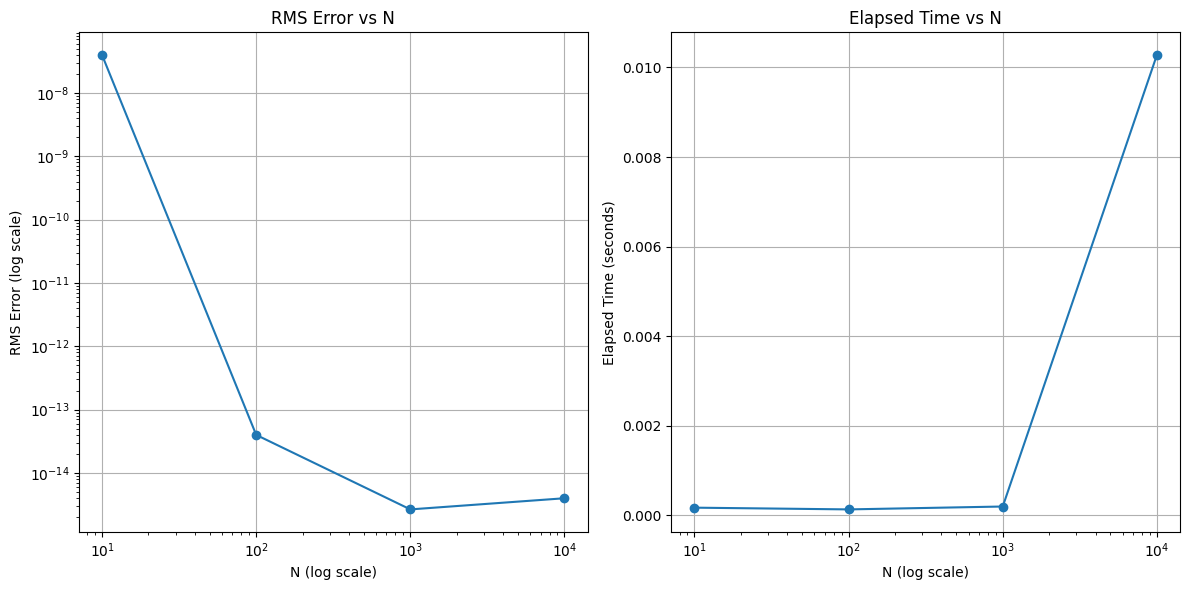

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Fungsi yang akan diintegrasikan
def f(x):
    return 4 / (1 + x**2)

# Metode Simpson 1/3
def simpson_1_3(a, b, n):
    if n % 2 != 0:
        raise ValueError("n harus genap untuk metode Simpson 1/3.")
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    S = y[0] + y[-1]
    S += 4 * sum(y[1:n:2])
    S += 2 * sum(y[2:n-1:2])
    return (h / 3) * S

# Fungsi untuk menghitung galat RMS
def rms_error(estimated_pi, true_pi):
    return np.sqrt(np.mean((estimated_pi - true_pi)**2))

# Nilai referensi pi
true_pi = 3.14159265358979323846

# Variasi nilai N
N_values = [10, 100, 1000, 10000]

# Tempat untuk menyimpan hasil
results = []

for N in N_values:
    start_time = time.time()
    estimated_pi = simpson_1_3(0, 1, N)
    end_time = time.time()
    error = rms_error(estimated_pi, true_pi)
    elapsed_time = end_time - start_time
    results.append((N, estimated_pi, error, elapsed_time))

# Print results
for N, estimated_pi, error, elapsed_time in results:
    print(f"N = {N}")
    print(f"Estimated Pi = {estimated_pi}")
    print(f"RMS Error = {error}")
    print(f"Elapsed Time = {elapsed_time} seconds\n")

# Plotting the results
N_values = [result[0] for result in results]
errors = [result[2] for result in results]
times = [result[3] for result in results]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(N_values, errors, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('RMS Error (log scale)')
plt.title('RMS Error vs N')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(N_values, times, marker='o')
plt.xscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('Elapsed Time (seconds)')
plt.title('Elapsed Time vs N')
plt.grid(True)

plt.tight_layout()
plt.show()
